In [1]:
from AoE2ScenarioParser.datasets.players import PlayerId
from AoE2ScenarioParser.datasets.units import UnitInfo
from AoE2ScenarioParser.datasets.buildings import BuildingInfo
from AoE2ScenarioParser.datasets.other import OtherInfo
from AoE2ScenarioParser.datasets.terrains import TerrainId
from aoe2mapgenerator.common.enums.enum import (
    MapLayerType, 
    ObjectSize, 
    GateTypes, 
    TemplateTypes, 
    ObjectRotation, 
    YamlReplacementKeywords,
    CheckPlacementReturnTypes
)

from aoe2mapgenerator.scenario.scenario import Scenario
import numpy as np
import random
from aoe2mapgenerator.common.constants.constants import DEFAULT_EMPTY_VALUE, BASE_SCENE_DIR, BASE_SCENARIO_NAME, TEMPLATE_DIR
from aoe2mapgenerator.common.enums.enum import GateTypes
import multiprocessing as mp
from aoe2mapgenerator.map.map import Map
import os
from aoe2mapgenerator.serializer.serializer import _get_enum_list, _recursive_parse_enum_to_string, serialize_map, get_all_functions_and_arguments, _get_functions, _get_function_arguments,_get_default_arguments
from aoe2mapgenerator.maingenerator import main_map_generator
import inspect
import ast
import json
from enum import Enum

In [3]:
_get_enum_list(UnitInfo)

['UnitInfo.ALFRED_THE_ALPACA',
 'UnitInfo.AMAZON_ARCHER',
 'UnitInfo.AMAZON_WARRIOR',
 'UnitInfo.ARAMBAI',
 'UnitInfo.ARBALESTER',
 'UnitInfo.ARCHER',
 'UnitInfo.ARMORED_ELEPHANT',
 'UnitInfo.BACTRIAN_CAMEL',
 'UnitInfo.BALLISTA_ELEPHANT',
 'UnitInfo.BANDIT',
 'UnitInfo.BATTERING_RAM',
 'UnitInfo.BATTLE_ELEPHANT',
 'UnitInfo.BEAR',
 'UnitInfo.BERSERK',
 'UnitInfo.BOARDER_GALLEY',
 'UnitInfo.BOMBARD_CANNON',
 'UnitInfo.BOYAR',
 'UnitInfo.BUTTERFLY1',
 'UnitInfo.BUTTERFLY2',
 'UnitInfo.BUTTERFLY3',
 'UnitInfo.CAMEL',
 'UnitInfo.CAMEL_ARCHER',
 'UnitInfo.CAMEL_RIDER',
 'UnitInfo.CAMEL_SCOUT',
 'UnitInfo.CANNON_GALLEON',
 'UnitInfo.CANOE',
 'UnitInfo.CAPPED_RAM',
 'UnitInfo.CARAVEL',
 'UnitInfo.CART',
 'UnitInfo.CATAPHRACT',
 'UnitInfo.CAVALIER',
 'UnitInfo.CAVALRY_ARCHER',
 'UnitInfo.CENTURION',
 'UnitInfo.CHAKRAM_THROWER',
 'UnitInfo.CHAMPION',
 'UnitInfo.CHU_KO_NU',
 'UnitInfo.COBRA_CAR',
 'UnitInfo.CONDOTTIERO',
 'UnitInfo.CONDOTTIERO_PLACEHOLDER',
 'UnitInfo.CONQUISTADOR',
 'UnitInfo.

In [2]:
_recursive_parse_enum_to_string((UnitInfo.LEGIONARY,2,3))

['UnitInfo.LEGIONARY', 2, 3]

In [ ]:
UnitInfo.Tarkan

In [7]:
string = "UnitInfo.LEGIONARY"

In [8]:
str([string])

"['UnitInfo.LEGIONARY']"

In [9]:
json.dumps([string])

'["UnitInfo.LEGIONARY"]'

In [6]:
UnitInfo.LEGIONARY

<UnitInfo.LEGIONARY: (1, 139, 2, 16669, False)>

In [43]:
signature = inspect.signature(getattr(Map, 'place_groups'))

In [44]:
defaults_dict = {param.name: param.default for param in signature.parameters.values() if param.default != inspect.Parameter.empty}

In [87]:
type(PlayerId.GAIA)

<enum 'PlayerId'>

In [74]:
defaults_dict['player_id'].name

'GAIA'

In [86]:
isinstance(PlayerId.GAIA, Enum)

True

In [59]:
import enum

In [61]:
isinstance(defaults_dict['player_id'], enum)

TypeError: isinstance() arg 2 must be a type, a tuple of types, or a union

In [50]:
MapLayerType.__name__

'MapLayerType'

In [25]:
inspect.getfullargspec(getattr(Map, 'place_groups'))

{}

In [22]:
json.loads("[1,2,3]")

'[1,2,3]'

In [11]:
json.loads('["MapLayerType.UNIT","MapLayerType.TERRAIN","MapLayerType.DECOR","MapLayerType.ZONE","MapLayerType.ELEVATION",[1,2,3]]')

['MapLayerType.UNIT',
 'MapLayerType.TERRAIN',
 'MapLayerType.DECOR',
 'MapLayerType.ZONE',
 'MapLayerType.ELEVATION',
 [1, 2, 3]]

In [15]:
json.loads("[1,2,5]")

[1, 2, 5]

In [9]:
json.loads("[1,2,3]")

[1, 2, 3]

In [5]:
ast.literal_eval(None)

ValueError: malformed node or string: None

In [1]:
UnitInfo.LEGIONARY

NameError: name 'UnitInfo' is not defined

In [12]:
import ast

In [13]:
def parse_string(input_str):
    try:
        # Try to evaluate the string as a literal (e.g., int, list, dict)
        parsed_value = ast.literal_eval(input_str)
        return parsed_value
    except (SyntaxError, ValueError) as e:
        # Handle the case when the string cannot be parsed
        # print(f"Error parsing string: {e}")
        return None

In [25]:
import json

In [37]:
json.loads('{"MapLayerType": "stirng"}')

{'MapLayerType': 'stirng'}

In [24]:
parse_string("[1,2,3,4]")[2]+123

126

In [11]:
'MapLayerType.UNIT'.split('.')

['MapLayerType', 'UNIT']

In [10]:
globals()['MapLayerType']

<enum 'MapLayerType'>

In [9]:
try:
    int("-1")
except:
    print("Hello32323")

In [5]:
a = "HEYLEOAO"

In [6]:
if type(a) == list:
    print("list")

In [2]:
input_name = "1 vs 7 default.aoe2scenario"
output_name = "TEST_BASIC_SCENARIO.aoe2scenario"

In [3]:
main_map_generator(BASE_SCENE_DIR+BASE_SCENARIO_NAME, BASE_SCENE_DIR+"AWESOMEMAP.aoe2scenario", TEMPLATE_DIR)

BUILD CITY
NEW TEMPLATE LOADED: oak_forest.yaml
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
MapLayerType DECOR
OtherInfo TREE_OAK_FOREST
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
MapLayerType DECOR
OtherInfo TREE_OAK_FOREST
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
MapLayerType DECOR
OtherInfo TREE_OAK_FOREST
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
MapLayerType DECOR
OtherInfo GOLD_MINE
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
MapLayerType DECOR
OtherInfo STONE_MINE
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
MapLayerType DECOR
OtherInfo STONE_MINE
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
MapLayerType DECOR
OtherInfo FORAGE_BUSH
MapLayerType DECOR
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
OtherInfo GRASS_PATCH_GREEN
MapLayerType DECOR
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
OtherInfo FLOWER_BED
MapLayerType DECOR
MapLayerType UNIT
MapLayerType TERRAIN

ValueError: Array space type (<TerrainId.WATER_DEEP: 22>, None) is not valid for map layer MapLayerType.TERRAIN.

In [3]:
# start_time = time()
# # result = np.array(lst)
# lst = np.array(lst)
# end_time = time()
# print(end_time-start_time)

In [4]:
map_size = 256
map = Map(map_size)
new_zones = map.voronoi(75)

keys = list(map.get_map_layer(MapLayerType.UNIT).dict.keys())

for city_zone in keys:
    map.add_borders(
        [MapLayerType.TERRAIN, MapLayerType.UNIT, MapLayerType.ZONE, MapLayerType.DECOR],
        [city_zone, city_zone, city_zone,city_zone],
        TerrainId.ROAD_FUNGUS,
        margin = 2,
        )

In [5]:
json = serialize_map(map)

In [15]:
def fun(default = 27):
    print(default)

In [8]:
def build_city(zone, player_id):
    """
    Build city in zone
    """
    print("BUILD CITY")

    map.add_borders(
        [MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.UNIT, MapLayerType.DECOR],
        [zone, zone, zone, zone],
        TerrainId.GRASS_2,
        margin = 10
        )

    map.place_template(
            'oak_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, (TerrainId.GRASS_2, PlayerId.GAIA), zone, zone],
            player_id = player_id,
        )

    map.place_template(
            'walls.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, zone, zone, zone],
            player_id = player_id,
        )
    
    map.add_borders(
        [MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.UNIT, MapLayerType.DECOR],
        [zone, zone, zone, zone],
        TerrainId.ROAD_FUNGUS,
        margin = 1
        )
    
    city_zones = map.voronoi(35,
                [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
                [zone, zone, zone, zone],
            )
    
    for city_zone in city_zones:
        map.add_borders(
            [MapLayerType.TERRAIN, MapLayerType.UNIT, MapLayerType.ZONE, MapLayerType.DECOR],
            [city_zone, city_zone, city_zone, city_zone],
            TerrainId.ROAD_FUNGUS,
            margin = 1
            )
        
        map.place_template(
            'oak_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [city_zone, city_zone, city_zone, city_zone],
        )

        map.place_template(
            'City.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [city_zone, city_zone, city_zone, city_zone],
            player_id = player_id,
        )

In [9]:
def build_snow_forest(zone, player_id):
    """
    Build snow forest in zone
    """
    print("BUILD FOREST")
    
    map.place_template(
            'snow_forest.yaml',
            map_layer_type_list = [MapLayerType.UNIT, MapLayerType.TERRAIN, MapLayerType.ZONE, MapLayerType.DECOR],
            array_space_type_list = [zone, zone, zone, zone],
            player_id = player_id,
        )

In [10]:
counter = 0
for i, zone in enumerate(new_zones):
    # print(zone)
    counter += 1
    if counter >= 9:
        counter = 1
    
    if random.random() > 0.5:
        build_city(zone, PlayerId(counter))
    else:
        build_snow_forest(zone, PlayerId(counter))
        

BUILD CITY
NEW TEMPLATE LOADED: oak_forest.yaml
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
MapLayerType DECOR
OtherInfo TREE_OAK_FOREST
PARAMETER:  map_layer_type_list
[<MapLayerType.UNIT: 0>, <MapLayerType.TERRAIN: 1>, <MapLayerType.ZONE: 3>, <MapLayerType.DECOR: 2>]
PARAMETER:  array_space_type_list
[(-1, <PlayerId.GAIA: 0>), (<TerrainId.GRASS_2: 12>, <PlayerId.GAIA: 0>), (-1, <PlayerId.GAIA: 0>), (-1, <PlayerId.GAIA: 0>)]
PARAMETER:  obj_type_list
[<OtherInfo.TREE_OAK_FOREST: (411, 32, 415, 16277, True)>]
PARAMETER:  player_id
None
PARAMETER:  groups
None
PARAMETER:  groups_density
1
PARAMETER:  group_size
250
PARAMETER:  group_density
1
PARAMETER:  clumping
7
PARAMETER:  clumping_func
None
PARAMETER:  margin
0
PARAMETER:  start_point
[-1, -1]
PARAMETER:  ghost_margin
True
PARAMETER:  place_on_n_maps
1
MapLayerType UNIT
MapLayerType TERRAIN
MapLayerType ZONE
MapLayerType DECOR
OtherInfo TREE_OAK_FOREST
PARAMETER:  map_layer_type_list
[<MapLayerType.UNIT: 0>, <MapLayerT

In [42]:
def _get_map_function_arguments(map, function_name: str) -> list:
    """
    Retrieves a list of arguments for a given function.
    
    Args:
        map (Map): Map object to modify.
        function_name (str): Name of the function to retrieve arguments from.
    
    Returns: 
        list: List of arguments for the given function.
    """
    return [arg for arg in map.__getattribute__(function_name).__code__.co_varnames if arg != 'self']

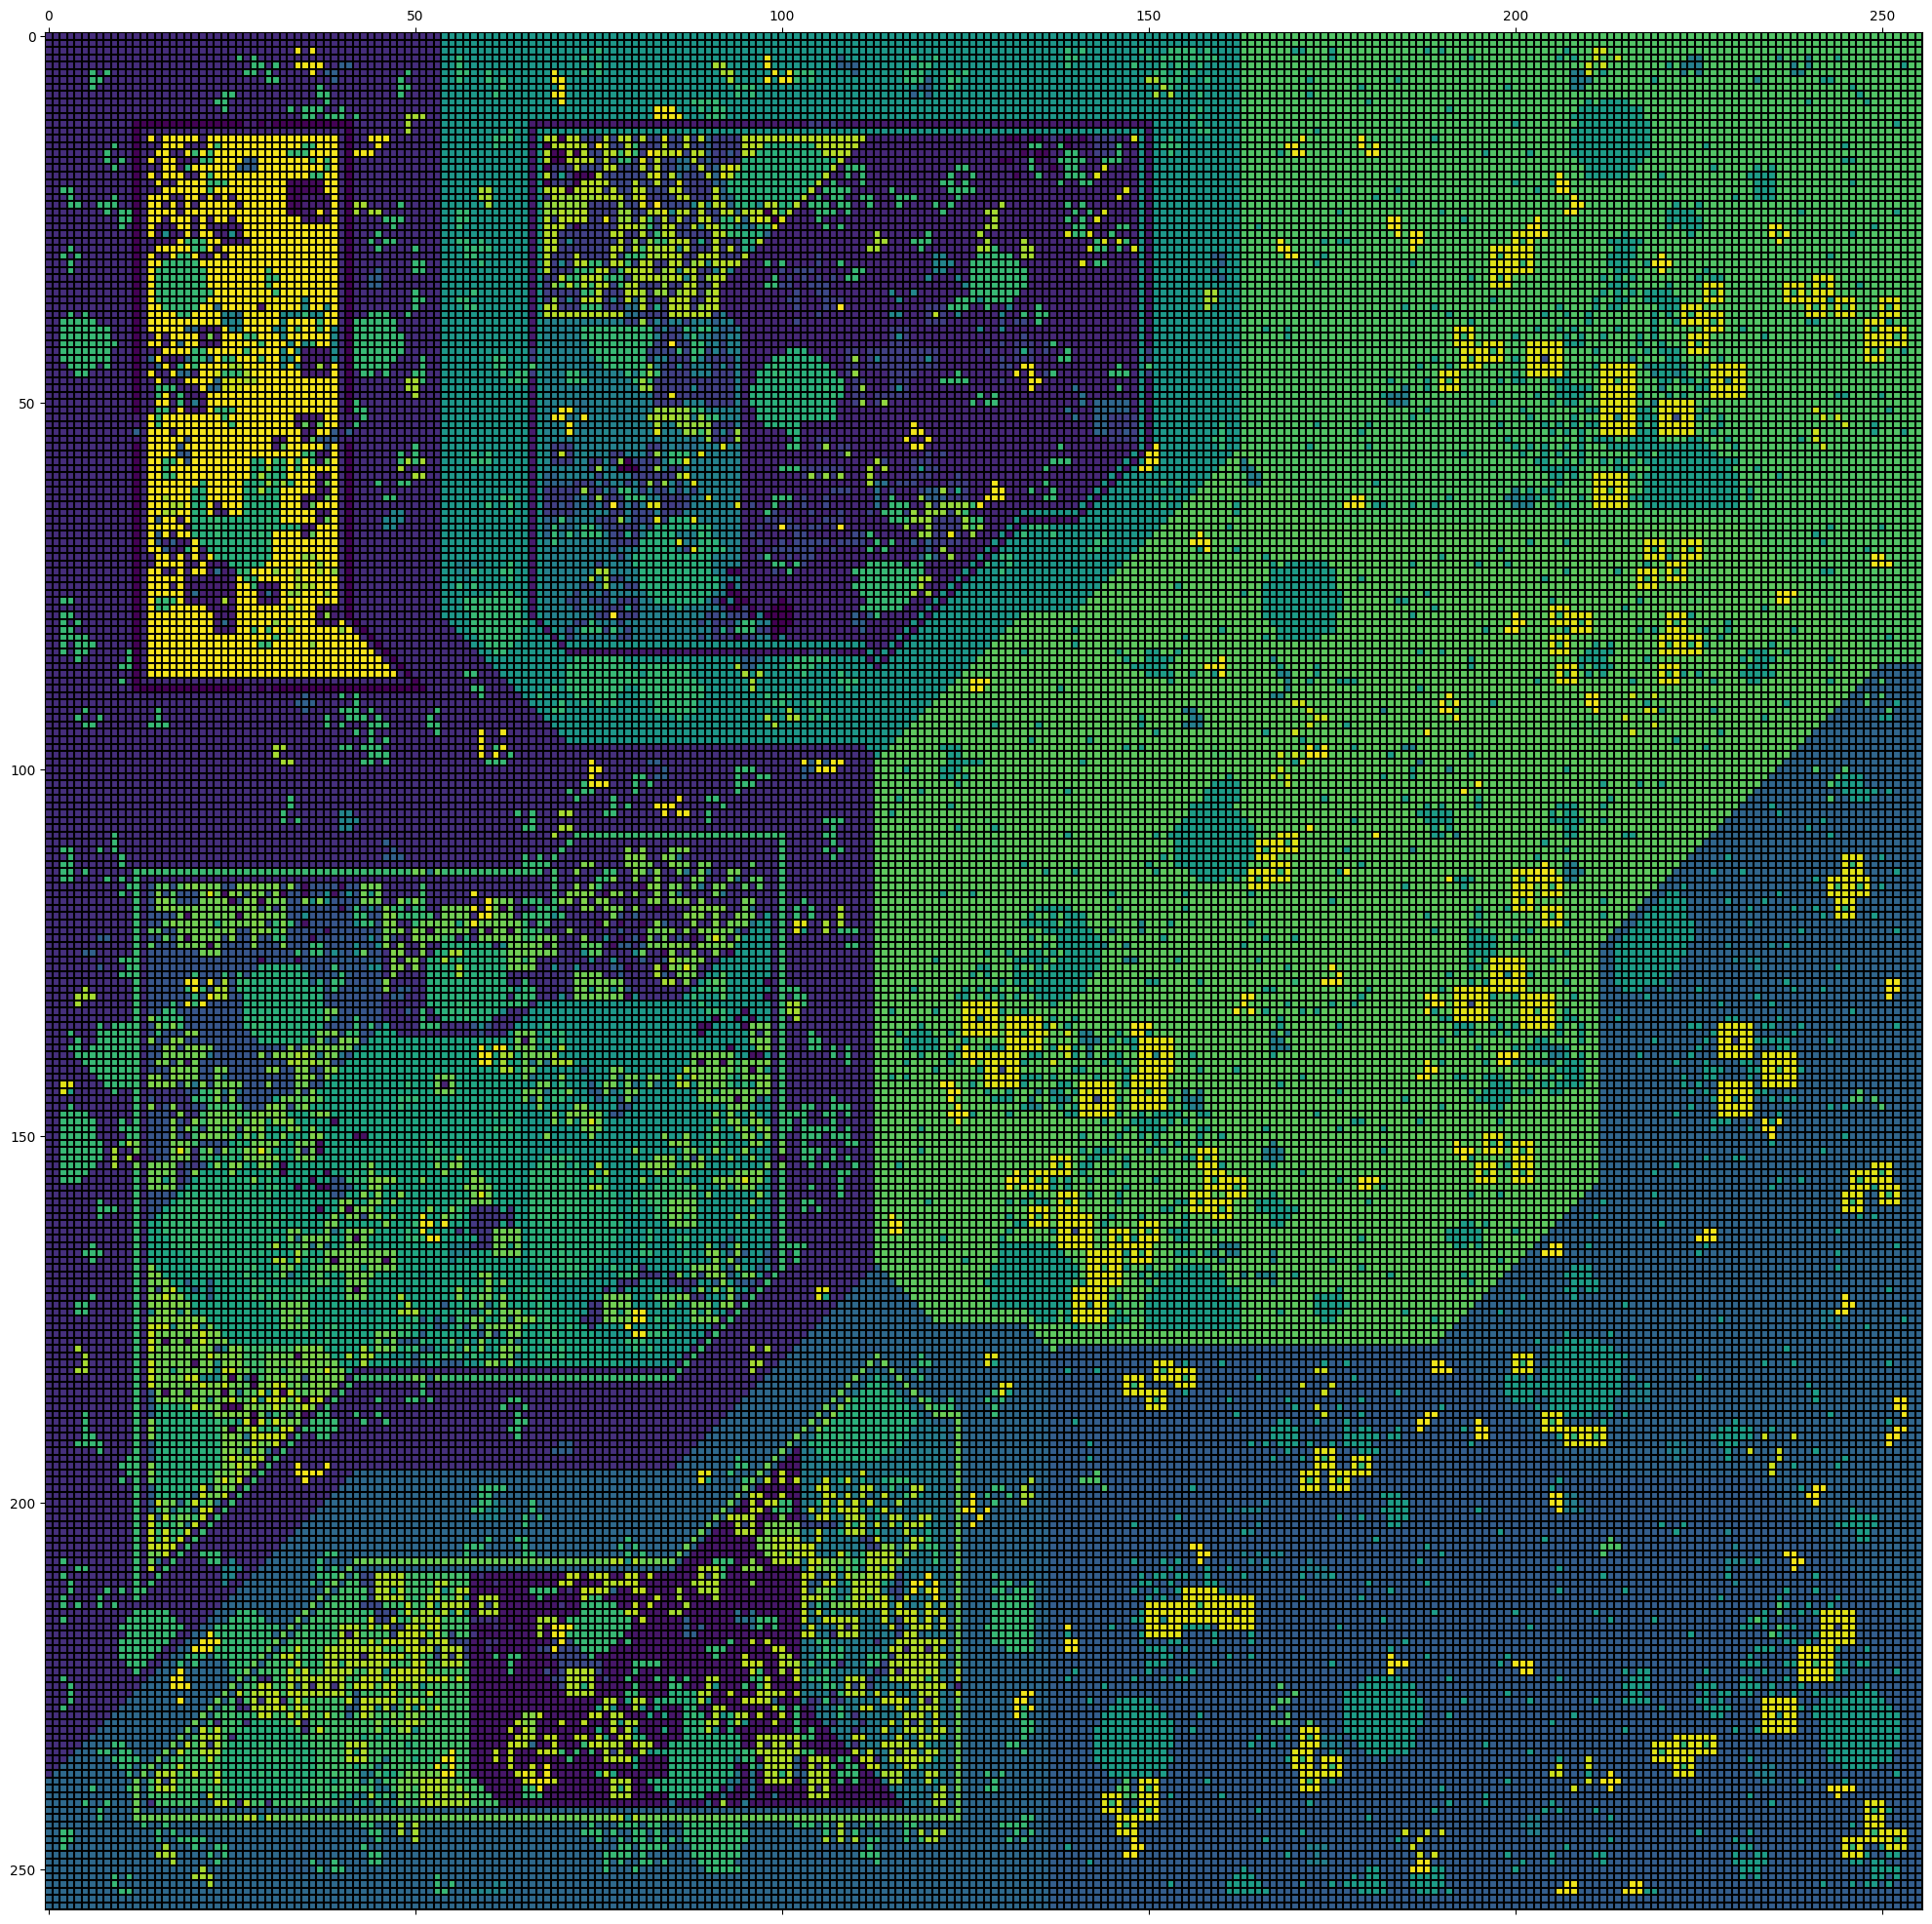

In [11]:
map.visualize_mat(MapLayerType.UNIT, include_zones=False)

In [13]:
scenario = Scenario(map)


[23:19:22] Reading file: 'C:\Users\josep\Games\Age of Empires 2 DE\76561198242754748\resources\_common\scenario\BASE_SCENARIO.aoe2scenario'
[23:19:22] Reading scenario file finished successfully.

############### Attributes ###############
>>> Game version: 'DE'
>>> Scenario version: 1.51
>>> Scenario variant: 'Age of Empires 2'
##########################################

[23:19:22] Loading scenario structure finished successfully.
[23:19:22] Parsing scenario file...
	✔ FileHeadereHeader data...
	✔ DataHeaderaHeader data...
	✔ Messagesessages data...
	✔ Cinematicsematics data...
	✔ BackgroundImagendImage data...
	✔ PlayerDataTwoDataTwo data...
	✔ GlobalVictoryVictory data...
	✔ Diplomacyplomacy data...
	✔ OptionsOptions data...
	✔ Maping Map data...
	✔ Unitsg Units data...
	✔ Triggersriggers data...
	✔ Filesg Files data...
[23:19:23] Parsing scenario file finished successfully.

[23:19:23] Setting up managers ...
	✔ MessageManagereManager...
	✔ PlayerManagerrManager...
	✔ MapManagerpM

In [14]:
scenario.change_map_size(map_size)
scenario.write_map()
scenario.save_file(os.path.join(BASE_SCENE_DIR, "TestScenario9999999.aoe2scenario"))

ValueError: None is not a valid PlayerId

In [ ]:
import tkinter as tk

n = 10
colors = ['red', 'orange', 'yellow', 'green', 'blue', 'purple', 'white']

def on_color_click(color):
    global selected_color
    selected_color = color

def on_square_click(row, col):
    btn = buttons[row][col]
    # print(btn)
    # print(type(btn))
    if btn.cget('bg') == selected_color:
        btn.config(bg='white')
    else:
        btn.config(bg=selected_color)

default_color = 'white'

root = tk.Tk()

frame = tk.Frame(root)
frame.pack(side=tk.LEFT)

buttons = []
for i in range(n):
    row = []
    for j in range(n):
        btn = tk.Button(frame, text='    ', command=lambda i=i, j=j: on_square_click(i, j), bg = default_color)
        btn.grid(row=i, column=j)
        row.append(btn)
    buttons.append(row)

color_frame = tk.Frame(root)
color_frame.pack(side=tk.RIGHT)

for color in colors:
    color_label = tk.Label(color_frame, text=color)
    color_label.pack(side=tk.BOTTOM)
    btn = tk.Button(color_frame, bg=color, command=lambda color=color: on_color_click(color))
    btn.pack(side=tk.BOTTOM)

selected_color = colors[0]

root.mainloop()

In [4]:
import tkinter as tk

root = tk.Tk()

# create three labels
label1 = tk.Label(root, text="Label 1")
label2 = tk.Label(root, text="Label 2")
label3 = tk.Label(root, text="Label 3")

# pack the first two labels to the left
label1.pack(side="left")
label2.pack(side="left")

# pack the third label to the right
label3.pack(side="right")

root.mainloop()